### Rommel Fernandes
### ELEC 699 Deep Learning Applications
### Project 3 - RNN and CHLA data
### 12-5-2018

In [1]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import missingno as msno
from sklearn import preprocessing


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Import Data and Save it 

In [2]:
# Import data
X_train = pd.read_hdf('Data/X_train.hdf')
X_test = pd.read_hdf('Data/X_test.hdf')
y_train = pd.read_hdf('Data/y_train.hdf')
y_test = pd.read_hdf('Data/y_test.hdf')

In [15]:
X_train['Heart rate (bpm)'].shape

(1113529,)

In [7]:

# Remove Multi-index Levels 
X_train1 = X_train.reset_index(level=[0, 1])
X_train1 = X_train1.rename(columns={b'encounterID': 'encounterID', b'absoluteTime': 'absoluteTime'})
X_test1 = X_test.reset_index(level=[0, 1])
X_test1 = X_test1.rename(columns={b'encounterID': 'encounterID', b'absoluteTime': 'absoluteTime'})
y_train1 = y_train.reset_index(level=[0, 1])
y_train1 = y_train1.rename(columns={b'encounterID': 'encounterID', b'absoluteTime': 'absoluteTime'})
y_test1 = y_test.reset_index(level=[0, 1])
y_test1 = y_test1.rename(columns={b'encounterID': 'encounterID', b'absoluteTime': 'absoluteTime'})


In [8]:
# Look at the data 
X_train.shape()

TypeError: 'tuple' object is not callable

In [9]:
# Count unique patinets 
print('Number of Patients in Training data: ',len(list(X_train1['encounterID'].unique())))
print('Number of Patients in Testing data: ',len(list(X_test1['encounterID'].unique())))

Number of Patients in Training data:  5000
Number of Patients in Testing data:  2690


In [10]:
pat_id = list(X_train1['encounterID'].unique())
val_id = list(X_test1['encounterID'].unique())
observ = pd.read_excel('data.xlsx')

### Identify major Missing data from training set 

In [13]:
# See Average Percent missing by Column 
appended_data = []
for val in pat_id:
    df = X_train1[X_train1['encounterID'] == val]
    percent_missing = df.notnull().sum() * 100 / len(df)
    appended_data.append(percent_missing)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data, axis=1)
percent_missing = appended_data.mean(axis = 1)
percent_missing.sort_values(ascending = False, inplace = True)

In [14]:
appended_data.head()

0           1           2      3           4     \
encounterID              100.0  100.000000  100.000000  100.0  100.000000   
absoluteTime             100.0  100.000000  100.000000  100.0  100.000000   
ABG Base excess (mEq/L)    0.0    2.380952    2.040816    0.0    4.054054   
ABG FiO2                   0.0    1.190476    2.040816    0.0    2.852853   
ABG HCO3 (mEq/L)           0.0    2.380952    2.040816    0.0    4.054054   

                          5           6      7      8      9      10    \
encounterID              100.0  100.000000  100.0  100.0  100.0  100.0   
absoluteTime             100.0  100.000000  100.0  100.0  100.0  100.0   
ABG Base excess (mEq/L)    0.0    1.851852    0.0    0.0    0.0    0.0   
ABG FiO2                   0.0    1.851852    0.0    0.0    0.0    0.0   
ABG HCO3 (mEq/L)           0.0    1.851852    0.0    0.0    0.0    0.0   

                               11          12     13          14     15    \
encounterID              100.000000  100.000000  100.0  100.000000  100.0   
absoluteTime             100.000000  100.000000  100.0  100.000000  100.0   
ABG Base excess (mEq/L)    8.661417    8.695652    0.0    1.519757    0.0   
ABG FiO2                   2.362205    7.826087    0.0    1.519757    0.0   
ABG HCO3 (mEq/L)           8.661417    8.695652    0.0    1.519757    0.0   

                          16          17     18          19     20     21    \
encounterID              100.0  100.000000  100.0  100.000000  100.0  100.0   
absoluteTime             100.0  100.000000  100.0  100.000000  100.0  100.0   
ABG Base excess (mEq/L)    0.0    6.666667    0.0    7.051282    0.0    0.0   
ABG FiO2                   0.0    0.000000    0.0    3.205128    0.0    0.0   
ABG HCO3 (mEq/L)           0.0    6.666667    0.0    7.051282    0.0    0.0   

                          22          23     24     25     26     27     28    \
encounterID              100.0  100.000000  100.0  100.0  100.0  100.0  100.0   
absoluteTime             100.0  100.000000  100.0  100.0  100.0  100.0  100.0   
ABG Base excess (mEq/L)    0.0    1.282051    0.0    0.0    0.0    0.0    0.0   
ABG FiO2                   0.0    0.000000    0.0    0.0    0.0    0.0    0.0   
ABG HCO3 (mEq/L)           0.0    1.282051    0.0    0.0    0.0    0.0    0.0   

                               29     30          31          32     33    \
encounterID              100.000000  100.0  100.000000  100.000000  100.0   
absoluteTime             100.000000  100.0  100.000000  100.000000  100.0   
ABG Base excess (mEq/L)    1.265823    0.0    2.247191    4.735812    0.0   
ABG FiO2                   0.000000    0.0    0.000000    3.718200    0.0   
ABG HCO3 (mEq/L)           1.265823    0.0    2.247191    4.735812    0.0   

                               34          35         36     37     38    \
encounterID              100.000000  100.000000  100.00000  100.0  100.0   
absoluteTime             100.000000  100.000000  100.00000  100.0  100.0   
ABG Base excess (mEq/L)    2.272727    5.263158    0.38961    0.0    0.0   
ABG FiO2                   0.000000    1.913876    0.25974    0.0    0.0   
ABG HCO3 (mEq/L)           2.272727    5.263158    0.38961    0.0    0.0   

                          39     40          41     42          43    \
encounterID              100.0  100.0  100.000000  100.0  100.000000   
absoluteTime             100.0  100.0  100.000000  100.0  100.000000   
ABG Base excess (mEq/L)    0.0    0.0    2.797203    0.0    0.740741   
ABG FiO2                   0.0    0.0    0.000000    0.0    0.555556   
ABG HCO3 (mEq/L)           0.0    0.0    2.797203    0.0    0.740741   

                               44     45          46     47     48     49    \
encounterID              100.000000  100.0  100.000000  100.0  100.0  100.0   
absoluteTime             100.000000  100.0  100.000000  100.0  100.0  100.0   
ABG Base excess (mEq/L)    1.149425    0.0    3.620474    0.0    0.0    0.0   
ABG FiO2                

In [16]:
# Highest Values by patient in list 
most = appended_data.idxmax(axis=1)
most.sort_values(inplace = True, ascending = False)

In [17]:
# See average percent missing by Column 
percent_missing

deltat                                   100.000000
Age                                      100.000000
absoluteTime                             100.000000
encounterID                              100.000000
PulseOximetry                             70.412501
Heart rate (bpm)                          70.086200
Respiratory rate (bpm)                    69.980289
SystolicBP                                58.047026
DiastolicBP                               58.032271
EyeResponse                               28.634939
MotorResponse                             28.633686
VerbalResponse                            28.601706
GlascowCS                                 28.470266
Capillary refill rate (sec)               26.592318
Temperature ( C)                          23.801234
Right pupillary response                  20.539820
Left pupillary response                   20.478475
EtCO2 (mmHg)                              14.681665
FiO2                                      11.099293
Ventilator r

### Create Functions for imputing and transformaing data 

Utilzed the paper that uses the data set and decribes the 265 features (Vitals, Labs, Interventions, Drugs). Utilized pre-processing methods similar to paper

M. Aczon, D. Ledbetter, L. Ho, A. Gunny, A. Flynn,
J. Williams, and R.Wetzel. Dynamic mortality risk predictions
in pediatric critical care using recurrent neural
networks. arXiv preprint arXiv:1701.06675, 2017.

https://arxiv.org/abs/1701.06675

In [18]:
obs_dict = observ.set_index('Feature').to_dict()['Value']

# Transform data with normaizliation 
def trans_data(df):
    for col in df:
        if col not in ['encounterID', 'absoluteTime']:
            obs = obs_dict[col]
            if obs== 'I':
                #normaizize data between [0,1]
                df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
            elif obs == 'V':
                #take the z-score 
                df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)
            elif obs == 'D':
                #nomrmalize data between [0,1]
                df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
            elif obs == 'L':
                # Take z-score of available data
                df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [19]:
# transform data with normaizlation 

def trans_data_test(df, df_train):
    for col in df:
        if col not in ['encounterID', 'absoluteTime']:
            obs = obs_dict[col]
            if obs== 'I':
                #normaizize data between [0,1]
                df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
            elif obs == 'V':
                #take the z-score 
                df[col] = (df[col] - df_train[col].mean())/df_train[col].std(ddof=0)
            elif obs == 'D':
                #nomrmalize data between [0,1]
                df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
            elif obs == 'L':
                # Take z-score of available data
                df[col] = (df[col] - df_train[col].mean())/df_train[col].std(ddof=0)


In [20]:

# Impute data with 0 if missing and forward fill

def impute_data(df):
    for col in df:
        if col not in ['encounterID', 'absoluteTime']:
            obs = obs_dict[col]
            if obs== 'I':
                df[col].fillna(0, inplace=True)
            elif obs == 'V':
                if pd.isnull(df[col][0]):
                    df[col].fillna(0, limit=1, inplace = True)
                df[col].fillna(method='ffill', inplace = True)
            elif obs == 'D':
                df[col].fillna(0, inplace=True)
            elif obs == 'L':
                if pd.isnull(df[col][0]):
                    df[col].fillna(0, limit=1, inplace = True)
                df[col].fillna(method='ffill', inplace = True)

### Impute and Transform the data 

In [21]:
trans_data(X_train)
impute_data(X_train)
trans_data_test(X_test,X_train)
impute_data(X_test)

### Find the Distribution of Timestamps 

In [22]:
# Finnd length of timestamps 
len_val = []
for val in pat_id:
    len_val.append(len(X_train1[X_train1['encounterID'] == val]))
pd.DataFrame({'val': len_val}).describe()

val
count   5000.000000
mean     222.705800
std      421.360152
min       15.000000
25%       49.000000
50%       94.000000
75%      218.000000
max    13127.000000

Looks like most of the time stamps are around 200-300 records, the 13217 record timestamp is an anomoly. We can assume that the average timestamp is aournd max length 300 

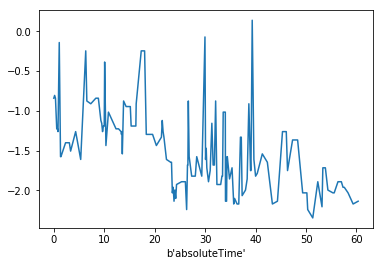

In [23]:
#Visualize data 
X_train.loc[3769, 'Heart rate (bpm)'].plot()
plt.show()

In [37]:
X_train.loc[8].values

array([[ 0.        ,  0.        ,  0.        , ...,  0.10349403,
         0.        , -0.69785299],
       [ 0.        ,  0.        ,  0.        , ...,  0.10349403,
         0.        , -0.69785299],
       [ 0.        ,  0.        ,  0.        , ...,  0.10349403,
         0.        , -1.15056936],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.10349403,
        -0.19544856, -0.74312463],
       [ 0.        ,  0.        ,  0.        , ...,  0.10349403,
        -0.19544856, -0.24513665],
       [ 0.        ,  0.        ,  0.        , ...,  0.10349403,
        -0.19544856, -1.37692755]])

### Pad data based on max length so the tensors can all be the same shape (batch, timestamp, features )

In [17]:
# Convert values into arrays and set max_length of timeseries to 300
max_length = 300

X_train = [X_train.loc[val].values for val in pat_id]
y_train = [y_train.loc[val].values for val in pat_id]
X_test = [X_test.loc[val].values for val in val_id]
y_test = [y_test.loc[val].values for val in val_id]

In [18]:
from keras.preprocessing import sequence
import tensorflow as tf

X_train = sequence.pad_sequences(X_train, dtype ='float32', maxlen = max_length, padding = 'post', truncating = 'post')
y_train = sequence.pad_sequences(y_train, dtype ='float32', maxlen = max_length, padding = 'post', truncating = 'post')
X_test = sequence.pad_sequences(X_test, dtype ='float32', maxlen = max_length, padding = 'post', truncating = 'post')
y_test = sequence.pad_sequences(y_test, dtype ='float32', maxlen = max_length, padding = 'post', truncating = 'post')

/home/rommeltf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### One layer LSTM Model

In [19]:
from keras.layers import LSTM
from keras import optimizers
from keras import layers
from keras import models


model = models.Sequential()
model.add(LSTM(265, input_shape = (None, X_train.shape[-1]), return_sequences=True))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=.001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.20)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 20s 5ms/step - loss: 0.2479 - acc: 0.9197 - val_loss: 0.1295 - val_acc: 0.9493
Epoch 2/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0979 - acc: 0.9645 - val_loss: 0.1268 - val_acc: 0.9579
Epoch 3/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0787 - acc: 0.9726 - val_loss: 0.1222 - val_acc: 0.9600
Epoch 4/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0623 - acc: 0.9797 - val_loss: 0.1549 - val_acc: 0.9570
Epoch 5/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0447 - acc: 0.9854 - val_loss: 0.1286 - val_acc: 0.9600
Epoch 6/10
4000/4000 [==============================] - 18s 4ms/step - loss: 0.0360 - acc: 0.9884 - val_loss: 0.1456 - val_acc: 0.9605
Epoch 7/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0270 - acc: 0.9918 - val_loss: 0.1595 - val_acc: 0.9559
Epoch 8

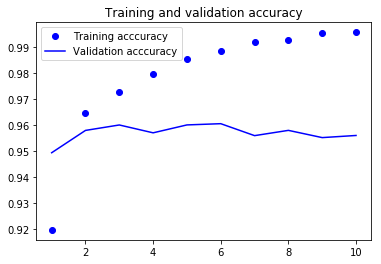

In [20]:
### Plot accuracy 

def plot_accuracy():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training acccuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation acccuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()
    
plot_accuracy()

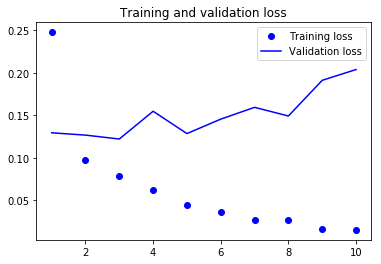

In [21]:
### Plot Losss
def plot_loss():
    acc = history.history['acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_loss()

### Two Layer LSTM Model

In [22]:
model2 = models.Sequential()
model2.add(LSTM(265, input_shape = (None, X_train.shape[-1]), return_sequences=True))
model2.add(LSTM(265, return_sequences = True))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer=optimizers.RMSprop(lr=.001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model2.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.20)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 38s 10ms/step - loss: 0.2264 - acc: 0.9302 - val_loss: 0.1635 - val_acc: 0.9465
Epoch 2/10
4000/4000 [==============================] - 36s 9ms/step - loss: 0.1062 - acc: 0.9642 - val_loss: 0.1346 - val_acc: 0.9547
Epoch 3/10
4000/4000 [==============================] - 36s 9ms/step - loss: 0.0773 - acc: 0.9727 - val_loss: 0.1542 - val_acc: 0.9501
Epoch 4/10
4000/4000 [==============================] - 36s 9ms/step - loss: 0.0596 - acc: 0.9799 - val_loss: 0.1792 - val_acc: 0.9486
Epoch 5/10
4000/4000 [==============================] - 36s 9ms/step - loss: 0.0535 - acc: 0.9832 - val_loss: 0.1723 - val_acc: 0.9538
Epoch 6/10
4000/4000 [==============================] - 36s 9ms/step - loss: 0.0319 - acc: 0.9902 - val_loss: 0.1736 - val_acc: 0.9575
Epoch 7/10
4000/4000 [==============================] - 36s 9ms/step - loss: 0.0204 - acc: 0.9937 - val_loss: 0.2034 - val_acc: 0.9565
Epoch 

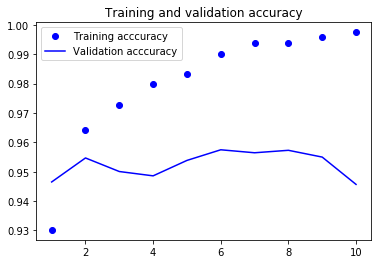

In [23]:
### Plot accuracy 

plot_accuracy()

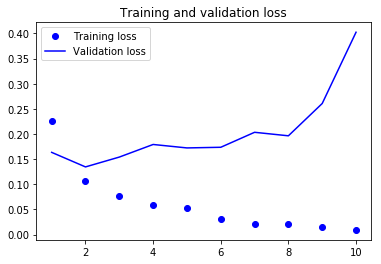

In [24]:
### Plot Losss

plot_loss()

### Three Layer LSTM Model 

In [25]:
model3 = models.Sequential()
model3.add(LSTM(265, input_shape = (None, X_train.shape[-1]), return_sequences=True))
model3.add(LSTM(265, return_sequences = True))
model3.add(LSTM(265, return_sequences = True))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer=optimizers.RMSprop(lr=.001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model3.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.20)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 57s 14ms/step - loss: 0.2486 - acc: 0.9210 - val_loss: 0.1577 - val_acc: 0.9498
Epoch 2/10
4000/4000 [==============================] - 55s 14ms/step - loss: 0.1159 - acc: 0.9599 - val_loss: 0.1591 - val_acc: 0.9536
Epoch 3/10
4000/4000 [==============================] - 54s 14ms/step - loss: 0.0880 - acc: 0.9698 - val_loss: 0.1321 - val_acc: 0.9566
Epoch 4/10
4000/4000 [==============================] - 55s 14ms/step - loss: 0.0680 - acc: 0.9765 - val_loss: 0.1590 - val_acc: 0.9520
Epoch 5/10
4000/4000 [==============================] - 54s 14ms/step - loss: 0.0515 - acc: 0.9828 - val_loss: 0.1630 - val_acc: 0.9589
Epoch 6/10
4000/4000 [==============================] - 55s 14ms/step - loss: 0.0340 - acc: 0.9891 - val_loss: 0.2186 - val_acc: 0.9464
Epoch 7/10
4000/4000 [==============================] - 54s 14ms/step - loss: 0.0277 - acc: 0.9932 - val_loss: 0.1870 - val_acc: 0.9621


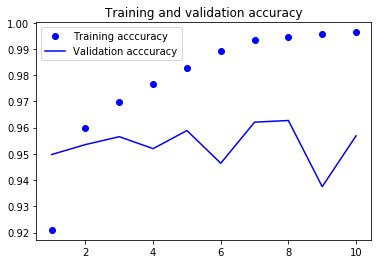

In [26]:
### Plot accuracy 

plot_accuracy()

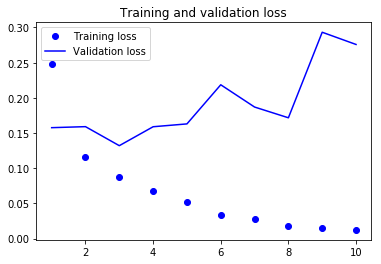

In [27]:
### Plot Losss

plot_loss()

### Create a MLP model 

In [28]:
# MLP model
model_mlp = models.Sequential()
model_mlp.add(layers.Dense(128, activation='relu', input_shape=(None, 265)))
model_mlp.add(layers.Dense(16, activation='relu'))
model_mlp.add(layers.Dense(1, activation='sigmoid'))
              
model_mlp.compile(optimizer=optimizers.RMSprop(lr=.001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model_mlp.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.20)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 531us/step - loss: 0.4959 - acc: 0.9463 - val_loss: 0.4638 - val_acc: 0.9678
Epoch 2/10
4000/4000 [==============================] - 1s 361us/step - loss: 0.4536 - acc: 0.9708 - val_loss: 0.4534 - val_acc: 0.9672
Epoch 3/10
4000/4000 [==============================] - 1s 372us/step - loss: 0.4375 - acc: 0.9733 - val_loss: 0.4450 - val_acc: 0.9678
Epoch 4/10
4000/4000 [==============================] - 1s 370us/step - loss: 0.4236 - acc: 0.9750 - val_loss: 0.4364 - val_acc: 0.9684
Epoch 5/10
4000/4000 [==============================] - 1s 356us/step - loss: 0.4099 - acc: 0.9763 - val_loss: 0.4299 - val_acc: 0.9679
Epoch 6/10
4000/4000 [==============================] - 1s 365us/step - loss: 0.3983 - acc: 0.9774 - val_loss: 0.4238 - val_acc: 0.9678
Epoch 7/10
4000/4000 [==============================] - 1s 367us/step - loss: 0.3866 - acc: 0.9789 - val_loss: 0.4169 - val_acc: 0.9687


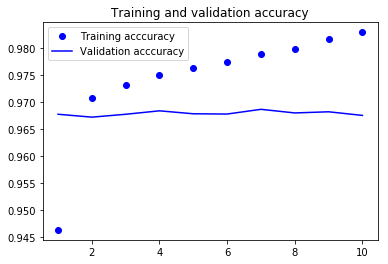

In [29]:
# Plot accuracy 
plot_accuracy()

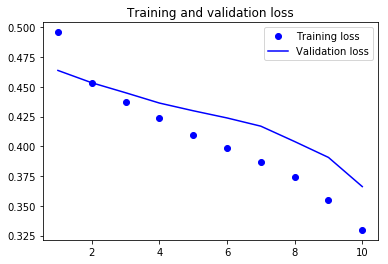

In [30]:
# plot losss

plot_loss()

### Calulate ROC and AUC for all Models above

Predicted values from LSTM models generated NaNs in  predicted values. It is a current GitHub issue within Keras that is being addressed for LSTM models. Therefore I could not generate the respective ROC and AUC for the scores

https://github.com/keras-team/keras/issues/2967

In [31]:
# Produce ROC
from sklearn.metrics import roc_curve, auc

y_test_sq = y_test[:,0,:].squeeze()

'''
y_pred_1 = model.predict(X_test)[:,-1,:].squeeze()
fpr_keras_1, tpr_keras_1, thresholds_keras_1 = roc_curve(y_test_sq, y_pred_1)

y_pred_2 = model2.predict(X_test)[:,-1,:].squeeze()
fpr_keras_2, tpr_keras_2, thresholds_keras_2 = roc_curve(y_test_sq, y_pred_2)

y_pred_3 = model3.predict(X_test)[:,-1,:].squeeze()
fpr_keras_3, tpr_keras_3, thresholds_keras_3 = roc_curve(y_test_sq, y_pred_3)
'''

y_pred_mlp = model_mlp.predict(X_test)[:,-1,:].squeeze()
fpr_keras_mlp, tpr_keras_mlp, thresholds_keras_mlp = roc_curve(y_test_sq, y_pred_mlp)


In [32]:
# Produce AUC
'''
auc_1 = auc(fpr_keras_1, tpr_keras_1)
print('lstm-1: ', auc_1)

auc_2 = auc(fpr_keras_2, tpr_keras_2)
print('lstm-2: ',auc_2)

auc_3 = auc(fpr_keras_3, tpr_keras_3)
print('lstm-3: ',auc_3)
'''
auc_mlp = auc(fpr_keras_mlp, tpr_keras_mlp)
print('mlp: ',auc_mlp)

mlp:  0.5


### Plot ROC curves for all models 

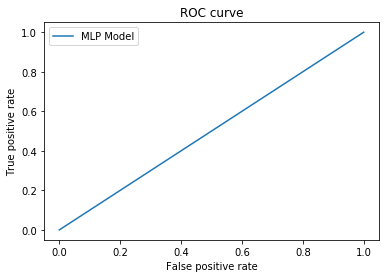

In [33]:
plt.figure()
'''
plt.plot(fpr_keras_1, tpr_keras_1, label='1-layer LSTM'.format(auc_1))
plt.plot(fpr_keras_2, tpr_keras_2, label='2-layer LSTM'.format(auc_2))
plt.plot(fpr_keras_3, tpr_keras_3, label='3-layer LSTM'.format(auc_1))
'''
plt.plot(fpr_keras_mlp, tpr_keras_mlp, label='MLP Model'.format(auc_mlp))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Model Anlayis and Comparrison

The LSTM model in this project was not SIGNIFICATLY better that tha of the MLP Model. Over 15 Epochs, the accuracy rate was very similar in all cases. Adding additional layers to the LSTM did not improve the models accuracy significantly. One can do use one to two layers at best to get good results. As for the MLP model, it is a cheaper alternative to running LSTM model. The results are as good for this project and dataset and it takes a lot less time to train. 